<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_pg_181~210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류(Classification)의 개요
분류 📁
- 지도학습의 대표적인 유형 중 하나
- 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것


 앙상블 방법 : 배깅, 부스팅 방식

   - 배깅 : 랜덤 포레스트 🌳
   - 부스팅 : 그래디언트 부스팅, XgBoost, LightGBM

-> 기본 알고리즘 : 결정 트리

# 결정 트리
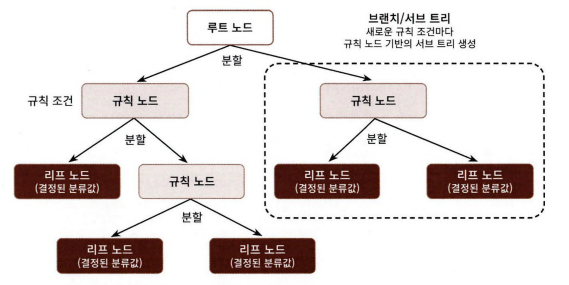

정보 균일도 측정 : 정보 이득 지수, 지니 계수

- 정보 이득 : 엔트로피라는 개념을 기반으로 합니다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여  있으면  엔트로피가 높고, 같은 값이 섞여  있으면 엔트로피가 낮습니다.

정보 이득 지수: 1 - (엔트로피 지수)

결정 트리는 이 정보 이득 지수로 분할 기준을 정합니다. 즉, 정보 이득이 높은 속성을 기준으로 분할

- 지니  계수 : 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
 0이 가장 평등하고 1로 갈수록 불평등

 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할

 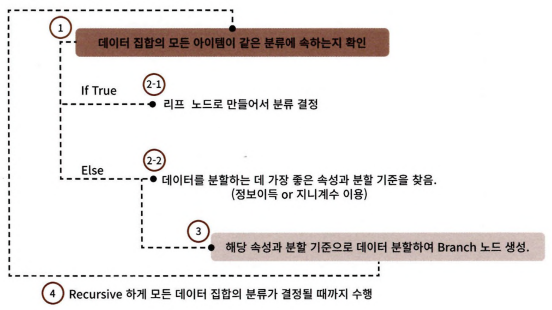

# 결정 트리 모델의 특징
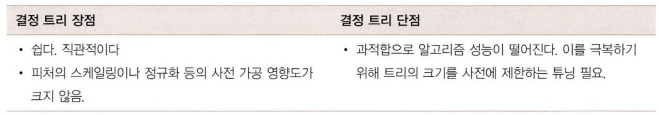

# 결정 트리 파라미터
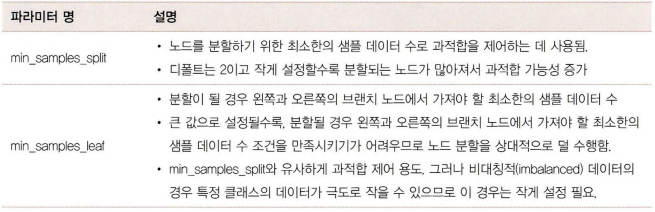
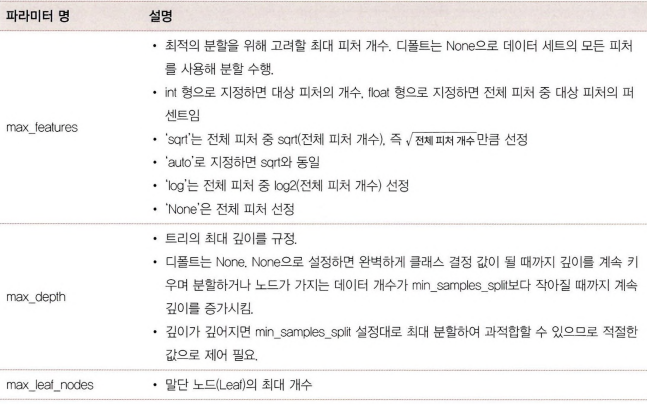

# 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- export_graphviz() : Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성

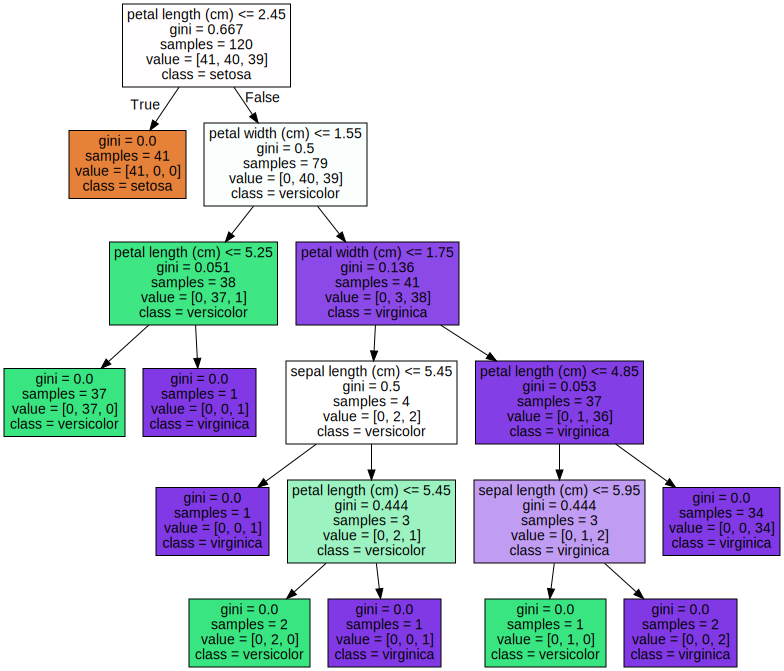

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm)〈= 2.45 : 자식 노드를 만들기 위한 규칙 조건입니다. 이 조건이 없으면 리프 노드

- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수

- samples는 현 규칙에 해당하는 데이터 건수

- value = [] : 클래스 값 기반의  데이터  건수입니다. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고  있으며, 0 : Setosa, 1 : Versicolor, 2 : Virginica 품종을 가리킴.

만일 Value = [41,40, 39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미

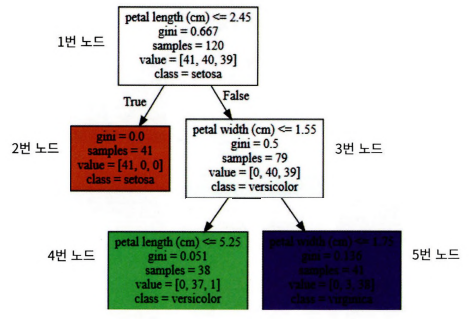

<1번 노드>
- samples = 120 : 전체 데이터가 120개라는 의미

- value = [41,40, 39] :  Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성

- sample 120개가 value = [41, 40,39] 분포도로 되어 있으므로 지니 계수는 0.667

- petal length (cm)〈= 2.45 규칙으로 자식 노드 생성

- class = setosa : 하위 노드를 가질 경우에 setosa의 개수가 41 개로 제일 많다는 의미




<2번 노드>
- petal length (cm) <= 2.45가 True인 규칙으로 생 성되는 리프 노드

- 41개의 샘플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정

- 지니 계수는 0임



<3번 노드>
- Petal length (cm)〈= 2.45가 False인 규칙 노드

- 79개의 샘플 데이터 중 Versicolor 40개, Virginica 39개로 여전히 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요

- petal width (cm)〈= 1.55 규칙으로 자식  노드 생성




<4번 노드>
- Petal width (cm)〈= 1.55가 True인 규칙 노드

- 38개의 샘플 데이터 중 Versicolor 37개, Virginica가 1개로 대부분이 versicolor임

- 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재돼 있으므로 petal length(cm)〈= 5.25라는 새 로운 규칙으로 다시 자식 노드 생성



<5번 노드>
- Petal width (cm)〈= 1.55가 False인 규칙 노드

- 41개의 샘플 데이터 중 Versicolor 3개, Virginica가 38개로 대부분이 virginica임
- 지니 계수는 0.136으로 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므 petal width(cm) <= 1.75라는 새로운 규칙으로 다시 자식 노드 생성

- 주황색은  0 : Setosa, 초록색은  1 : Versicolor, 보라색은 2 : Virginica 레이블
- 색깔이  짙어질수록 지니 계수가 낮고 해당
레이블에 속하는 샘플 데이터가 많다는 의미

- max_ depth : 결정 트리의 최대 트리 깊이를 제어

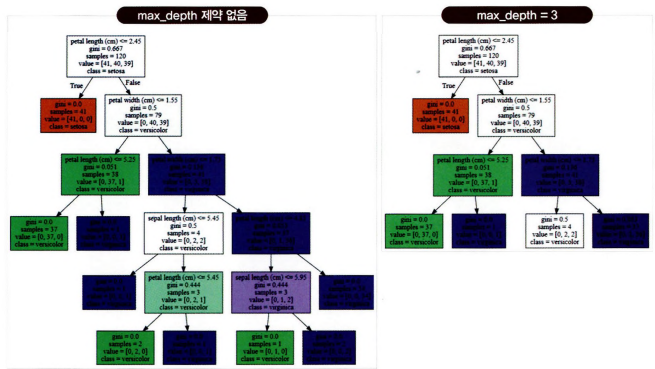

- min_samples_splits : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

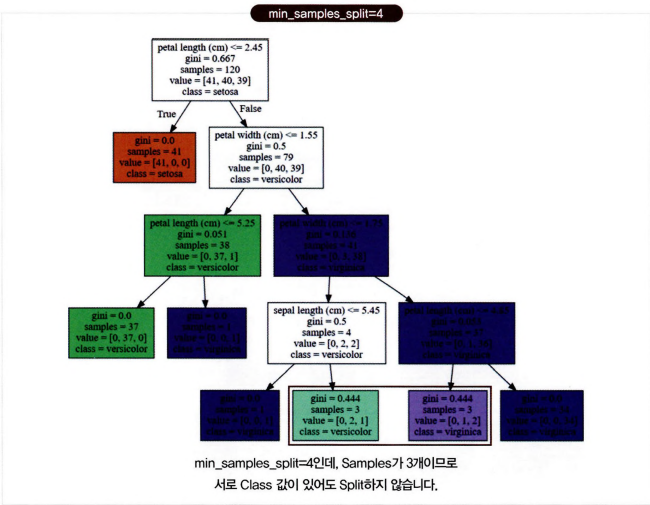

- fit()으로 학습된 DecisionTreeClassifier 객체 변수인 dt_clf에서 feature_importances_ 속성을 가져와 피처별로 중요도 값을 매핑하고 이를 막대그래프로 표현

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

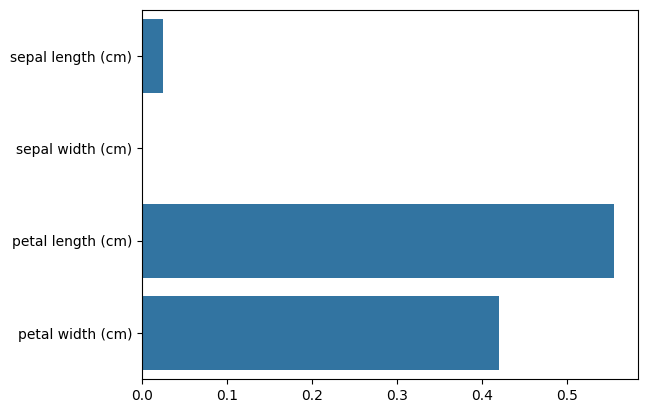

In [3]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

- petal_length가 피처 중요도가 가장 높음

# 결정 트리 과적합(Overfitting)

- make_classification() 함수를 이용해 2 개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 이를 그래프 형태로 시각화
- make_classification() 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트

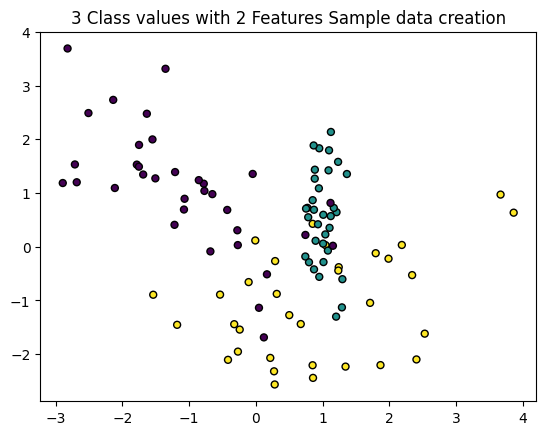

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

- 결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifier를 학습하고 결정 기준 경계를 시각화

In [5]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

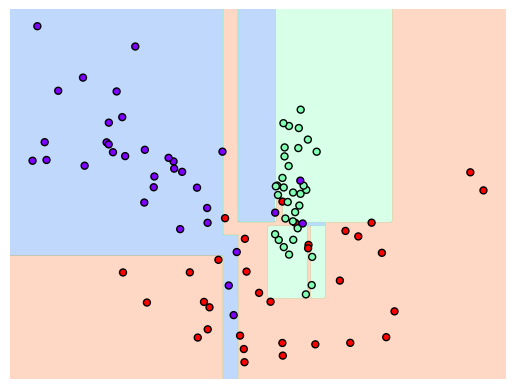

In [6]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 일부 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌음

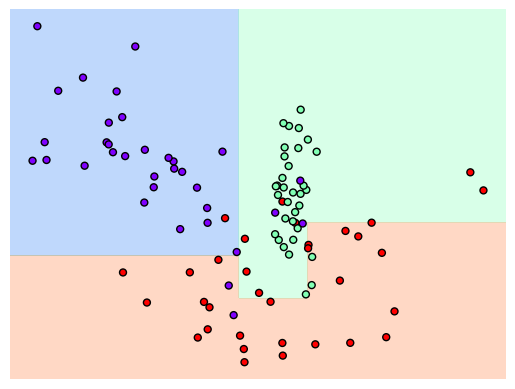

In [7]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 결정 트리 실습  - 사용자 행동 인식 데이터 세트
- 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 업로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 중복된 피처명이 얼마나 있는지 확인

In [9]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개의 피처명이 중복

- 이 중복된 피처명에 대해서는 원본 피처명에 _1또는 _2를 추가 로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df()를 생성

In [10]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name']  = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0  else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

- train 디렉터리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트, test 디렉터리에 있는 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DataFrame에 로드

In [11]:
import pandas as  pd
def get_human_dataset( ):

  # 각  데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('/content/drive/MyDrive/features.txt',sep='\s+' ,header=None, names=[ 'column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해  리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/y_train.txt',sep='\s+',header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/y_test.txt',sep='\s+',header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [12]:
print('## 학습 피처 데이터셋 info()')
print (X_train. info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [13]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


- 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


- 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향을 살펴보기 위해 min_samples_split는 16으로 고정하고 max_depth를 6, 8, 10, 12, 16, 20, 24 로 계속 늘리면서 예측 성능을 측정

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [16]:
# GridSearchCV 객체의  cv_results_ 속성을  DataFrame으로  생성 .
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터  값과  그때의  테스트  세트, 학습  데이터  세트의  정확도  수치  추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [17]:
max_depths = [6, 8, 10,  12,  16, 20, 24]
# max.depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [21]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}


grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


-  테스트 데이터 세트에 예측을 수행

In [22]:
best_df_clf = grid_cv.best_estimator_
predl = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, predl)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


- 마지막으로 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성을 이용해 알아봄
- 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현

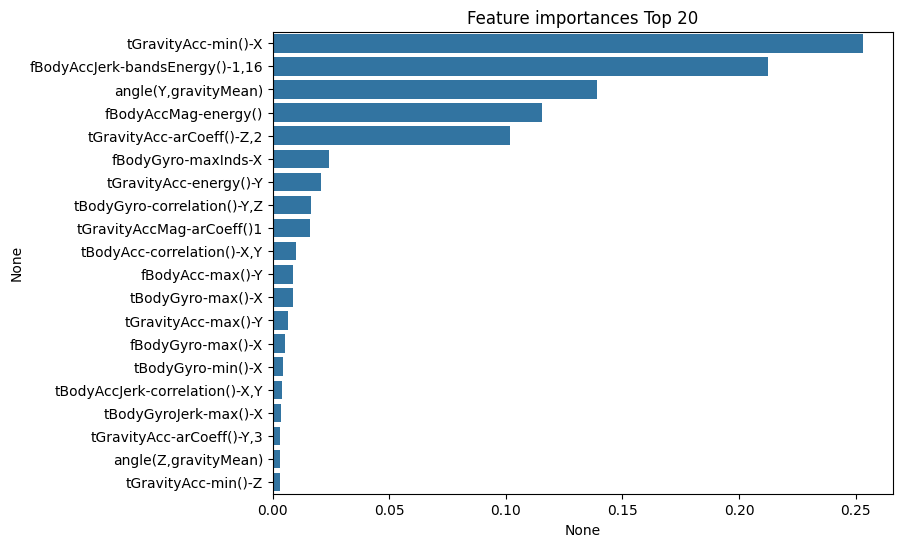

In [23]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()